!pip install torch

!pip install ultralytics ultralyticsplus

%pip install opencv-python

In [75]:
import ultralytics
from ultralytics import YOLO
from ultralyticsplus import render_result
import numpy as np
import requests
import requests
import cv2
import os
from PIL import Image

In [68]:
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open('image.jpg', 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)

        # Load the image from the file
        image = cv2.imread('image.jpg')

        # Remove the temporary image file
        os.remove('image.jpg')

        return image
    else:
        print('Error loading image:', response.status_code)
        return None

In [69]:
image_url = 'https://ultralytics.com/images/bus.jpg'
image = load_image_from_url(image_url)

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')


In [76]:


def image_to_numpy(image):
    # Check if the image is a PIL Image object
    if isinstance(image, Image.Image):
        # Convert PIL Image to NumPy array
        image = np.array(image)
    else:
        # Assume the image is already a NumPy array
        pass

    # Check if the image is RGB or grayscale
    if len(image.shape) == 3:
        # Convert RGB image to RGB24 format
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    else:
        # Convert grayscale image to grayscale format
        image = image[..., None]

    # Return the NumPy array
    return image


In [82]:
def pred(image):
    results = model(image)
    return render_result(model=model, image=image, result=results[0])

In [83]:
img_np = image_to_numpy(image)

In [85]:
img_np.shape

(1080, 810, 3)

In [87]:
result_img = pred(img_np)


0: 640x480 4 persons, 1 bus, 121.1ms
Speed: 1.0ms preprocess, 121.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


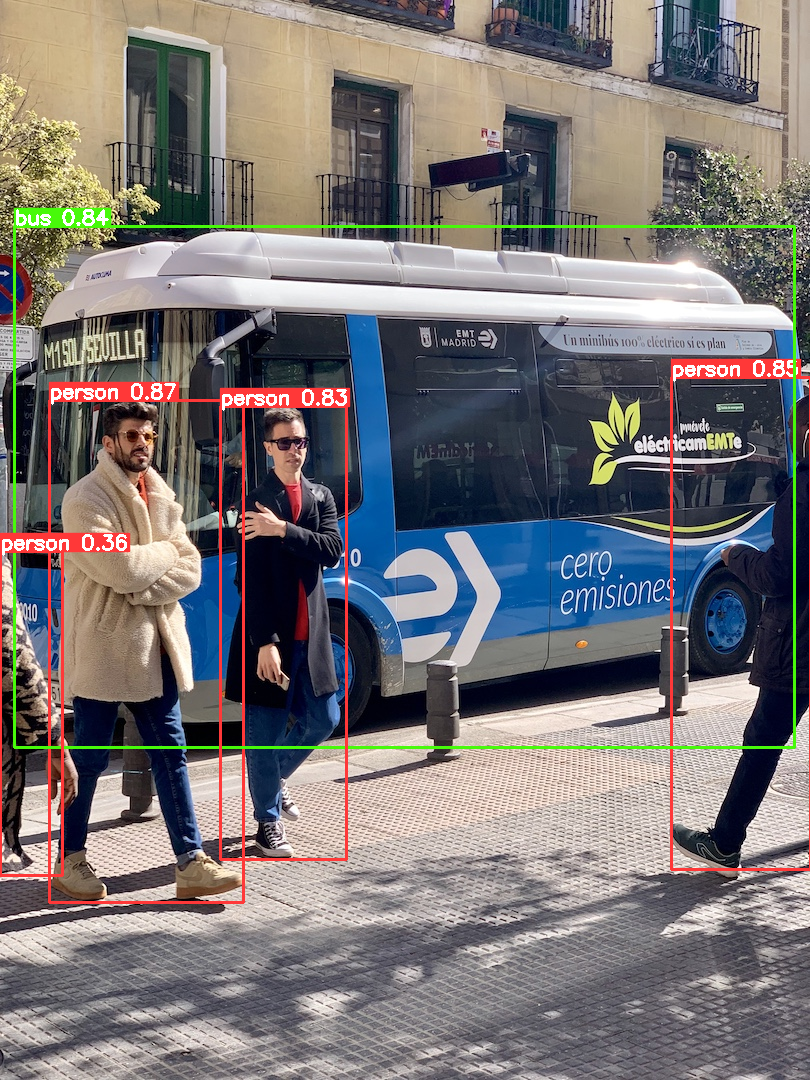

In [89]:
result_img

In [88]:
image_to_numpy(result_img).shape

(1080, 810, 3)

In [90]:
np.array(result_img).shape

(1080, 810, 3)